In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/car data.csv"

In [21]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

 **DATASET LOADING AND INSPECTION OF THE DATA**

In [5]:
cars = pd.read_csv(path)

Inspecting the first 5 values of the data set

In [6]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Checking the number of rows and columns

In [8]:
cars.shape

(301, 9)

Checking for null values

In [9]:
cars.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


There are no null values

Trying to get information about the 'cars' dataset

In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Checking the categorical Variables: Fuel_Type,Selling_type and Transmission

In [11]:
print(cars.Fuel_Type.value_counts())
print(cars.Selling_type.value_counts())
print(cars.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Changing categorical data to number form , i.e. encoding them .

In [15]:
cars.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
cars.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
cars.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


**DATA** **VISUALIZATION**

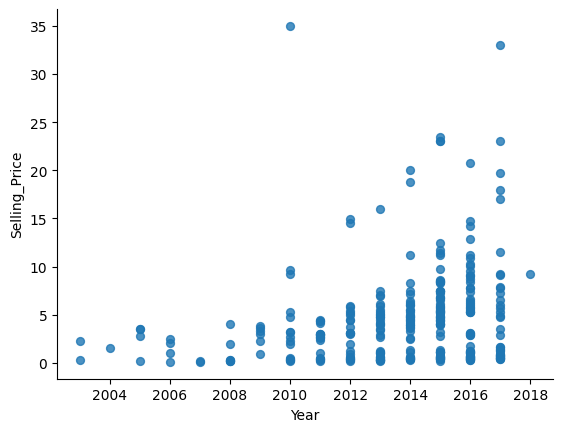

In [22]:
# Year vs Selling_Price

from matplotlib import pyplot as plt
cars.plot(kind='scatter', x='Year', y='Selling_Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

From the above scatter plot we can say that the selling price of the cars are at peak in the year 2010 which is a good point to be noted although it may not help us in further analysis.

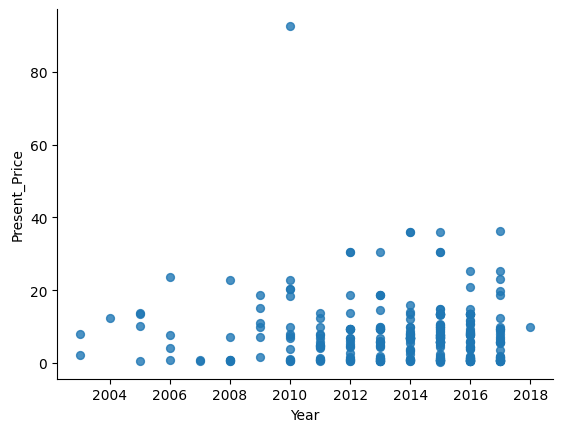

In [27]:
# Year vs Present_Price
from matplotlib import pyplot as plt
cars.plot(kind='scatter', x='Year', y='Present_Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)



From the above scatter plot we can say that the selling price of the cars are at peak in the year 2010 which is a good point to be noted although it may not help us in further analysis.

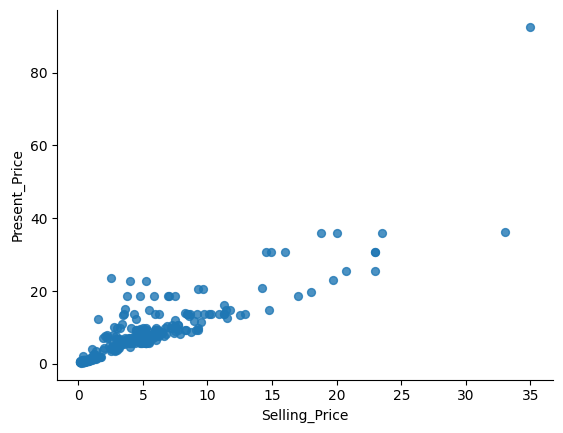

In [26]:
 #Selling_Price vs Present_Price

from matplotlib import pyplot as plt
cars.plot(kind='scatter', x='Selling_Price', y='Present_Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

From the above scatter plot we can say that the selling price and present prices of cars align almost all the time except for a few points where it can be noted through the scatteredness of the points on the graph

In [35]:
import plotly.express as px
fig = px.scatter_matrix(cars,template='plotly',dimensions=['Selling_Price',
                                                          'Present_Price'],color='Year')
fig.show()

**SPLITTING THE DATASET INTO TRAINING AND TESTING SETS**

In [42]:
X = cars.drop(['Car_Name','Selling_Price'],axis=1)
Y = cars['Selling_Price']
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [43]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

**MODEL TRAINING , FITTING AND PREDICTION USING "LINEAR REGRESSION"**

Fitting training data

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

Predicting training data

In [49]:
train_predict = lin_reg.predict(x_train)
# R squared Error
from sklearn import metrics
err_score = metrics.r2_score(y_train, train_predict)
print("R squared : ", err_score)

R squared :  0.8796483009370215


Scatter plot : ACTUAL PRICE vs PREDICTED PRICE (for trained data)

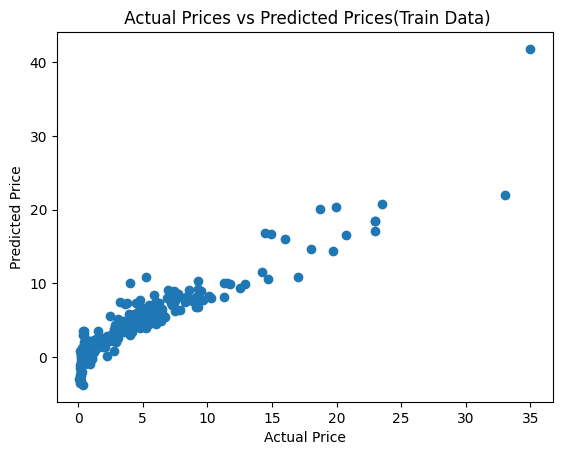

In [53]:
plt.scatter(y_train, train_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices(Train Data)")
plt.show()

Predicting testing data

In [51]:
test_predict = lin_reg.predict(x_test)
# R squared Error
err_score = metrics.r2_score(y_test, test_predict)
print("R squared : ", err_score)

R squared :  0.8365861023210703


Scatter plot : ACTUAL PRICE vs PREDICTED PRICE (for testing data)

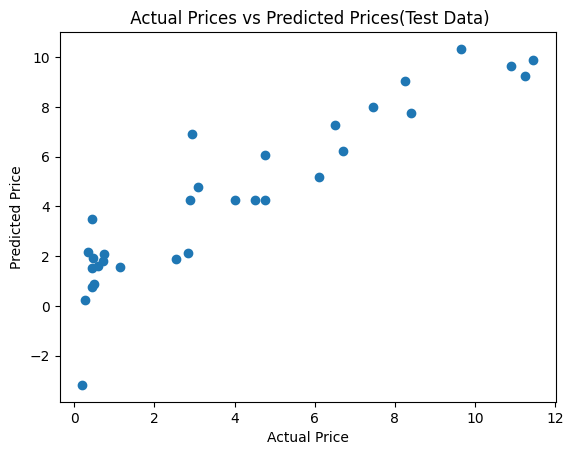

In [52]:
plt.scatter(y_test, test_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices(Test Data)")
plt.show()